In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [2]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
imgpoints = []

In [3]:
fname = '/home/shankha/MuralPlot/opencv/chessboard.jpg'
img = cv2.imread(fname)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [4]:
ret, corners = cv2.findChessboardCorners(gray, (7,6), None)

In [5]:
corners2=cv2.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)
imgpoints.append(corners)

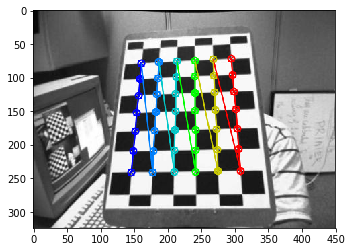

In [9]:
cv2.drawChessboardCorners(img, (7,6), corners2, ret)
plt.imshow(img)

In [54]:
rng = 42
x_values = [p[0][0] for p in corners][:rng]
y_values = [p[0][1] for p in corners][:rng]

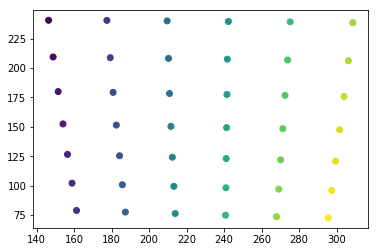

In [55]:
plt.scatter(x_values, y_values, c=range(len(x_values)))

In [67]:
src_pts = np.array([p[0] for p in corners])
dst_pts = []
for x in range(1, 7):
    for y in range(7):
        dst_pts.append([x*20-1, (7-y)*20-1])
dst_pts = np.array(dst_pts)

In [59]:
M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC)

In [64]:
im_out = cv2.warpPerspective(img, M, (140,160))

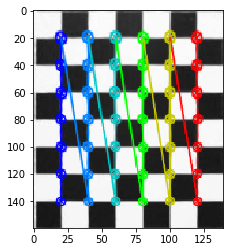

In [65]:
plt.imshow(im_out)

In [52]:
list(zip(src_pts, dst_pts))

[(array([ 146.39855957,  240.75753784], dtype=float32), array([ 20, 120])),
 (array([ 148.83552551,  209.49371338], dtype=float32), array([ 20, 100])),
 (array([ 151.51916504,  180.04098511], dtype=float32), array([20, 80])),
 (array([ 154.09693909,  152.48091125], dtype=float32), array([20, 60])),
 (array([ 156.50086975,  126.54233551], dtype=float32), array([20, 40])),
 (array([ 158.92370605,  102.02474213], dtype=float32), array([20, 20])),
 (array([ 161.30209351,   78.79632568], dtype=float32), array([ 40, 120])),
 (array([ 177.50489807,  240.6578064 ], dtype=float32), array([ 40, 100])),
 (array([ 179.30621338,  208.87289429], dtype=float32), array([40, 80])),
 (array([ 180.81489563,  179.32913208], dtype=float32), array([40, 60])),
 (array([ 182.54638672,  151.49290466], dtype=float32), array([40, 40])),
 (array([ 184.25480652,  125.36465454], dtype=float32), array([40, 20])),
 (array([ 185.76144409,  100.64969635], dtype=float32), array([ 60, 120])),
 (array([ 187.34809875,   77